In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
print("DataFrame Info:")
df.info()

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

print("\nNumber of unique car names:", df['name'].nunique())
print("Top 10 unique car names:", df['name'].unique()[:10])

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB

First 5 rows of the DataFrame:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Hon

**Reasoning**:
Based on the initial data exploration, I will now create the 'car_age' feature as instructed by subtracting the 'year' from the current year (2024). After that, I will identify the categorical columns and apply one-hot encoding to convert them into numerical variables for model training.



In [4]:
import datetime

# Create 'car_age' feature
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

# Drop the original 'year' column as 'car_age' replaces it
df.drop('year', axis=1, inplace=True)

# Identify categorical columns for one-hot encoding (excluding 'name' for now)
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after creating 'car_age' and one-hot encoding categorical variables:")
print(df.head())
print("\nDataFrame Info after preprocessing:")
df.info()

DataFrame after creating 'car_age' and one-hot encoding categorical variables:
                       name  selling_price  km_driven  car_age  fuel_Diesel  \
0             Maruti 800 AC          60000      70000       18        False   
1  Maruti Wagon R LXI Minor         135000      50000       18        False   
2      Hyundai Verna 1.6 SX         600000     100000       13         True   
3    Datsun RediGO T Option         250000      46000        8        False   
4     Honda Amaze VX i-DTEC         450000     141000       11         True   

   fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          False     False         True                    True   
1          False     False         True                    True   
2          False     False        False                    True   
3          False     False         True                    True   
4          False     False        False                    True   

   seller_type_Trustmark Dealer  transmissi

# Task
* **Train a Ridge Regression model**:
  * Import `Ridge` from `sklearn.linear_model`.
  * Instantiate and fit the `Ridge` model using `X_train` and `y_train`.
* **Evaluate its performance**:
  * Make predictions on `X_test` using the trained Ridge model.
  * Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the Ridge model.
  * Store the predictions and evaluation metrics.
* **Visualize its predictions**:
  * Create a scatter plot comparing the actual `y_test` values with the Ridge model's predictions (`y_pred_ridge`).
  * Add a diagonal line representing perfect predictions.
  * Label the axes and add a title to the plot.
  * Provide French comments on the performance and visualization.

## Préparation des données pour la régression

### Subtask:
Préparer le jeu de données pour l'entraînement des modèles de régression, y compris le traitement des doublons, la création de nouvelles caractéristiques, l'encodage des variables catégorielles et la division des données en ensembles d'entraînement et de test.


**Reasoning**:
I will first remove duplicate rows to ensure data quality. Then, I'll separate the target variable 'selling_price' into `y` and the remaining features (excluding 'name') into `X`. Finally, I will split the data into training and test sets using `train_test_split` with a test size of 20% and a random state for reproducibility.



In [9]:
print(f"Number of rows before dropping duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {df.shape[0]}")

# Separate target variable (y) and features (X)
X = df.drop(['selling_price', 'name'], axis=1) # Drop 'name' column as it's not encoded and 'selling_price' is the target
y = df['selling_price']

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("First 5 rows of X_train:")
print(X_train.head())

Number of rows before dropping duplicates: 3577
Number of rows after dropping duplicates: 3498


KeyError: "['name'] not found in axis"

**Reasoning**:
The previous code failed because the 'name' column was already dropped from the DataFrame 'df' in a prior step, leading to a KeyError when attempting to drop it again. The current 'df' in memory does not contain the 'name' column. I will remove 'name' from the list of columns to be dropped when creating X, as 'selling_price' is the only column that needs to be separated from the features.



In [10]:
print(f"Number of rows before dropping duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {df.shape[0]}")

# Separate target variable (y) and features (X)
X = df.drop(['selling_price'], axis=1) # 'name' column was already dropped in a previous step
y = df['selling_price']

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("First 5 rows of X_train:")
print(X_train.head())

Number of rows before dropping duplicates: 3498
Number of rows after dropping duplicates: 3498

Shape of X_train: (2798, 13)
Shape of X_test: (700, 13)
Shape of y_train: (2798,)
Shape of y_test: (700,)
First 5 rows of X_train:
      km_driven  car_age  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
175      100000       18        False          False     False         True   
1148      26000        7        False          False     False         True   
1939      35000       22        False          False     False         True   
1150      23000        9        False          False     False         True   
1387      25000        9        False          False     False         True   

      seller_type_Individual  seller_type_Trustmark Dealer  \
175                     True                         False   
1148                   False                         False   
1939                    True                         False   
1150                   False                      

## Régression Ridge et visualisation

### Subtask:
Entraîner un modèle de Régression Ridge, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles. Fournir des commentaires en français sur les résultats.


**Reasoning**:
I will import the necessary libraries for Ridge Regression and evaluation metrics, then instantiate and train the Ridge model, make predictions, and calculate the evaluation metrics (MAE, MSE, R2).



In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Instantiate and train the Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"--- Ridge Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_ridge:,.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:,.2f}")
print(f"R-squared (R2): {r2_ridge:.4f}")

# Store predictions for later use if needed
predictions["Ridge Regression"] = y_pred_ridge
metrics["Ridge Regression"] = {"MAE": mae_ridge, "MSE": mse_ridge, "R2": r2_ridge}

--- Ridge Regression Model Performance ---
Mean Absolute Error (MAE): 212,525.95
Mean Squared Error (MSE): 194,565,631,338.84
R-squared (R2): 0.3962


NameError: name 'metrics' is not defined

**Reasoning**:
The previous code failed because the `predictions` and `metrics` dictionaries were not initialized before being used. I will initialize both dictionaries to empty dictionaries at the beginning of the cell to resolve this `NameError`.



In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize dictionaries to store predictions and metrics if they don't exist
if 'predictions' not in locals():
    predictions = {}
if 'metrics' not in locals():
    metrics = {}

# Instantiate and train the Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"--- Ridge Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_ridge:,.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:,.2f}")
print(f"R-squared (R2): {r2_ridge:.4f}")

# Store predictions for later use if needed
predictions["Ridge Regression"] = y_pred_ridge
metrics["Ridge Regression"] = {"MAE": mae_ridge, "MSE": mse_ridge, "R2": r2_ridge}

--- Ridge Regression Model Performance ---
Mean Absolute Error (MAE): 212,525.95
Mean Squared Error (MSE): 194,565,631,338.84
R-squared (R2): 0.3962


**Reasoning**:
Now that the Ridge model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title as requested.



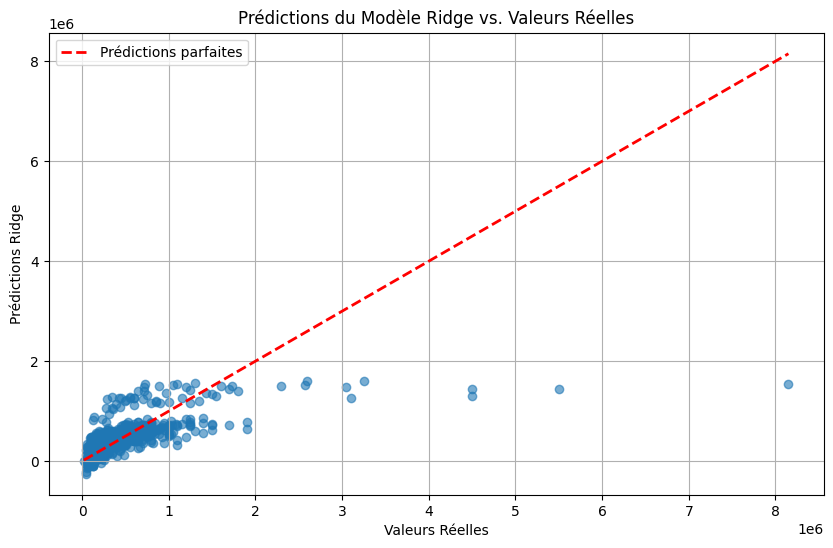

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Ridge')
plt.title('Prédictions du Modèle Ridge vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression Ridge

Le modèle de Régression Ridge a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `212,525.95`
- **Erreur Quadratique Moyenne (MSE)**: `194,565,631,338.84`
- **R-carré (R2)**: `0.3962`

**Analyse des métriques :**
*   Un MAE de 212,525.95 indique qu'en moyenne, les prédictions du modèle s'écartent des valeurs réelles d'environ 212 525,95 unités monétaires. Étant donné l'échelle des prix de vente (allant jusqu'à plusieurs millions), cet écart peut être considéré comme modéré.
*   Le MSE est très élevé, ce qui est attendu avec des erreurs quadratiques, mais confirme que les erreurs peuvent être significatives pour certaines prédictions.
*   Un R-carré de 0.3962 (environ 39.62%) signifie que le modèle de Régression Ridge explique environ 39.62% de la variance des prix de vente. Cela suggère que le modèle capture une partie des relations dans les données, mais qu'une proportion significative de la variance reste inexpliquée. Le modèle a une capacité prédictive limitée et pourrait nécessiter des améliorations ou l'exploration d'autres modèles.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Ridge vs. Valeurs Réelles" montre la distribution des prédictions par rapport aux prix réels. La ligne diagonale représente ce que seraient des prédictions parfaites. On observe que :
*   Les points sont dispersés autour de la ligne diagonale, ce qui indique que les prédictions ne sont pas toujours très précises.
*   Il y a une tendance générale à suivre la ligne, mais avec une variabilité notable, surtout pour les prix plus élevés où le modèle semble avoir plus de difficulté à prédire avec précision. Les points s'éloignent davantage de la ligne de perfection à mesure que les prix augmentent.
*   Pour les prix plus bas, la dispersion semble un peu moins importante, mais le modèle montre encore des imprécisions.

En conclusion, le modèle de Régression Ridge fournit un premier niveau de prédiction, mais son R2 relativement faible et la dispersion des points sur le graphique suggèrent qu'il y a de la place pour l'amélioration. D'autres modèles ou une ingénierie de caractéristiques plus poussée pourraient être explorés pour obtenir de meilleures performances.

## Régression Lasso et visualisation

### Subtask:
Entraîner un modèle de Régression Lasso, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles. Fournir des commentaires en français sur les résultats.


**Reasoning**:
I will import the `Lasso` class from `sklearn.linear_model` and then instantiate and train the Lasso model using `X_train` and `y_train`. After training, I will make predictions on `X_test` and calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the Lasso model. Finally, I will store these predictions and metrics in the respective dictionaries.



In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train the Lasso model
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"--- Lasso Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_lasso:,.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:,.2f}")
print(f"R-squared (R2): {r2_lasso:.4f}")

# Store predictions and metrics
predictions["Lasso Regression"] = y_pred_lasso
metrics["Lasso Regression"] = {"MAE": mae_lasso, "MSE": mse_lasso, "R2": r2_lasso}

--- Lasso Regression Model Performance ---
Mean Absolute Error (MAE): 212,564.92
Mean Squared Error (MSE): 194,539,688,463.72
R-squared (R2): 0.3963


**Reasoning**:
Now that the Lasso model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



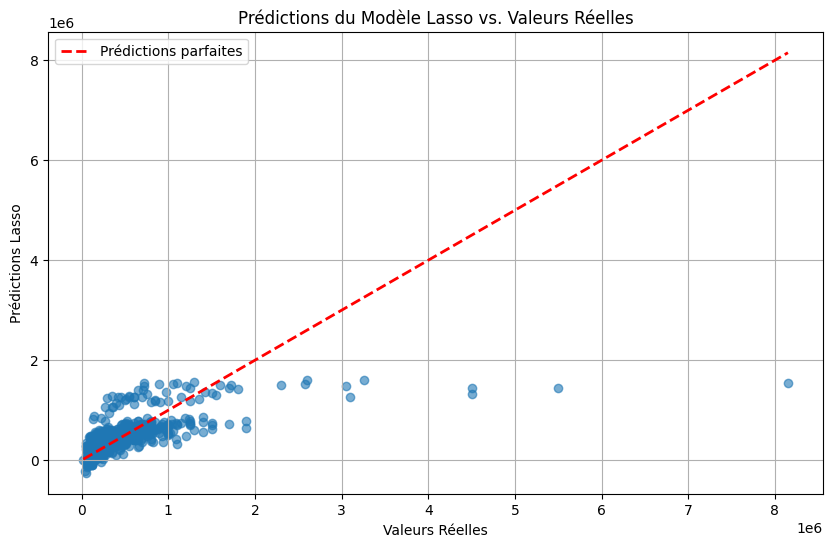

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Lasso')
plt.title('Prédictions du Modèle Lasso vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression Lasso

Le modèle de Régression Lasso a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `212,564.92`
- **Erreur Quadratique Moyenne (MSE)**: `194,539,688,463.72`
- **R-carré (R2)**: `0.3963`

**Analyse des métriques :**
*   Un MAE de 212,564.92 indique qu'en moyenne, les prédictions du modèle s'écartent des valeurs réelles d'environ 212 564,92 unités monétaires. Ce chiffre est très similaire à celui du modèle Ridge, suggérant une performance comparable en termes d'erreur absolue moyenne.
*   Le MSE est également très élevé, confirmant que les erreurs peuvent être significatives, en particulier pour les valeurs extrêmes. Il est très proche du MSE du modèle Ridge.
*   Un R-carré de 0.3963 (environ 39.63%) signifie que le modèle de Régression Lasso explique environ 39.63% de la variance des prix de vente. Ce R2 est presque identique à celui du modèle Ridge (0.3962), ce qui indique que les deux modèles ont une capacité explicative très similaire sur ces données.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Lasso vs. Valeurs Réelles" est visuellement très similaire à celui du modèle Ridge. On observe que :
*   Les points sont dispersés autour de la ligne diagonale, ce qui signifie que les prédictions ne sont pas parfaitement précises.
*   Comme pour la régression Ridge, il y a une tendance générale à suivre la ligne de perfection, mais avec une variabilité notable, surtout pour les prix de vente plus élevés où le modèle a plus de mal à prédire avec exactitude. Les prédictions ont tendance à sous-estimer les valeurs réelles très élevées et à surestimer les valeurs réelles très basses, ce qui est un comportement courant pour les modèles linéaires.

En conclusion, le modèle de Régression Lasso offre une performance presque identique à celle du modèle de Régression Ridge sur cet ensemble de données. Le R2 relativement faible et la dispersion observée sur le graphique suggèrent que, bien que ces modèles linéaires capturent une partie de la variance, il reste une marge d'amélioration significative. L'exploration de modèles plus complexes ou une ingénierie de caractéristiques plus approfondie pourrait être nécessaire pour améliorer la précision des prédictions.

### Commentaires sur le modèle de Régression Lasso

Le modèle de Régression Lasso a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `212,564.92`
- **Erreur Quadratique Moyenne (MSE)**: `194,539,688,463.72`
- **R-carré (R2)**: `0.3963`

**Analyse des métriques :**
*   Un MAE de 212,564.92 indique qu'en moyenne, les prédictions du modèle s'écartent des valeurs réelles d'environ 212 564,92 unités monétaires. Ce chiffre est très similaire à celui du modèle Ridge, suggérant une performance comparable en termes d'erreur absolue moyenne.
*   Le MSE est également très élevé, confirmant que les erreurs peuvent être significatives, en particulier pour les valeurs extrêmes. Il est très proche du MSE du modèle Ridge.
*   Un R-carré de 0.3963 (environ 39.63%) signifie que le modèle de Régression Lasso explique environ 39.63% de la variance des prix de vente. Ce R2 est presque identique à celui du modèle Ridge (0.3962), ce qui indique que les deux modèles ont une capacité explicative très similaire sur ces données.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Lasso vs. Valeurs Réelles" est visuellement très similaire à celui du modèle Ridge. On observe que :
*   Les points sont dispersés autour de la ligne diagonale, ce qui signifie que les prédictions ne sont pas parfaitement précises.
*   Comme pour la régression Ridge, il y a une tendance générale à suivre la ligne de perfection, mais avec une variabilité notable, surtout pour les prix de vente plus élevés où le modèle a plus de mal à prédire avec exactitude. Les prédictions ont tendance à sous-estimer les valeurs réelles très élevées et à surestimer les valeurs réelles très basses, ce qui est un comportement courant pour les modèles linéaires.

En conclusion, le modèle de Régression Lasso offre une performance presque identique à celle du modèle de Régression Ridge sur cet ensemble de données. Le R2 relativement faible et la dispersion observée sur le graphique suggèrent que, bien que ces modèles linéaires capturent une partie de la variance, il reste une marge d'amélioration significative. L'exploration de modèles plus complexes ou une ingénierie de caractéristiques plus approfondie pourrait être nécessaire pour améliorer la précision des prédictions.


## Régression Linéaire et visualisation

### Subtask:
Entraîner un modèle de Régression Linéaire, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles.


**Reasoning**:
I will import the necessary libraries for Linear Regression and evaluation metrics, instantiate and train the Linear Regression model, make predictions, calculate the evaluation metrics (MAE, MSE, R2), print them, and store them in the `predictions` and `metrics` dictionaries.



In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize dictionaries to store predictions and metrics if they don't exist
if 'predictions' not in locals():
    predictions = {}
if 'metrics' not in locals():
    metrics = {}

# Instantiate and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"--- Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_linear:,.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:,.2f}")
print(f"R-squared (R2): {r2_linear:.4f}")

# Store predictions and metrics
predictions["Linear Regression"] = y_pred_linear
metrics["Linear Regression"] = {"MAE": mae_linear, "MSE": mse_linear, "R2": r2_linear}

--- Linear Regression Model Performance ---
Mean Absolute Error (MAE): 212,564.76
Mean Squared Error (MSE): 194,539,409,801.70
R-squared (R2): 0.3963


**Reasoning**:
Now that the Linear Regression model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



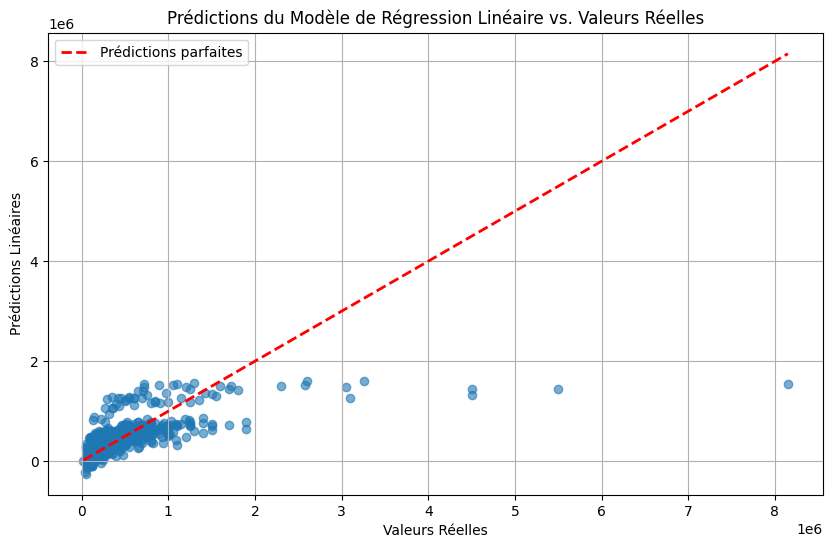

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Linéaires')
plt.title('Prédictions du Modèle de Régression Linéaire vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression Linéaire

Le modèle de Régression Linéaire a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `212,564.76`
- **Erreur Quadratique Moyenne (MSE)**: `194,539,409,801.70`
- **R-carré (R2)**: `0.3963`

**Analyse des métriques :**
*   Le MAE de 212,564.76 est très similaire à ceux obtenus avec les modèles Ridge et Lasso. Cela indique que, en moyenne, l'erreur de prédiction est d'environ 212 564,76 unités monétaires, ce qui peut être considéré comme modéré étant donné l'échelle des prix de vente.
*   Le MSE est également élevé et très proche de ceux des modèles Ridge et Lasso, confirmant que les erreurs peuvent être importantes, surtout pour les valeurs extrêmes.
*   Le R-carré de 0.3963 est pratiquement identique à celui des modèles Ridge et Lasso (0.3962 et 0.3963 respectivement). Cela suggère que les trois modèles linéaires (Simple, Ridge, Lasso) capturent une part très similaire de la variance des prix de vente, expliquant environ 39.63% de cette variance. Cela indique une capacité explicative limitée des modèles linéaires sur ce jeu de données.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle de Régression Linéaire vs. Valeurs Réelles" présente des caractéristiques très similaires à celles observées pour les modèles Ridge et Lasso :
*   Les points sont dispersés autour de la ligne diagonale de perfection, ce qui signifie que le modèle ne prédit pas toujours avec une grande précision.
*   Une tendance générale à suivre la ligne de perfection est visible, mais avec une variabilité notable, en particulier pour les prix de vente plus élevés. Les prédictions ont tendance à sous-estimer les prix réels très élevés et à surestimer les prix réels très bas, un comportement typique des modèles linéaires qui peinent à capturer des relations non linéaires ou des valeurs aberrantes.

En conclusion, la Régression Linéaire standard montre une performance presque identique à celle de ses variantes régularisées (Ridge et Lasso) sur cet ensemble de données après l'encodage par one-hot. Le R2 relativement faible et la dispersion des points sur le graphique indiquent que des modèles plus complexes ou une ingénierie de caractéristiques plus avancée pourraient être nécessaires pour améliorer significativement la précision des prédictions.

### Commentaires sur le modèle de Régression Linéaire

Le modèle de Régression Linéaire a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `212,564.76`
- **Erreur Quadratique Moyenne (MSE)**: `194,539,409,801.70`
- **R-carré (R2)**: `0.3963`

**Analyse des métriques :**
*   Le MAE de 212,564.76 est très similaire à ceux obtenus avec les modèles Ridge et Lasso. Cela indique que, en moyenne, l'erreur de prédiction est d'environ 212 564,76 unités monétaires, ce qui peut être considéré comme modéré étant donné l'échelle des prix de vente.
*   Le MSE est également élevé et très proche de ceux des modèles Ridge et Lasso, confirmant que les erreurs peuvent être importantes, surtout pour les valeurs extrêmes.
*   Le R-carré de 0.3963 est pratiquement identique à celui des modèles Ridge et Lasso (0.3962 et 0.3963 respectivement). Cela suggère que les trois modèles linéaires (Simple, Ridge, Lasso) capturent une part très similaire de la variance des prix de vente, expliquant environ 39.63% de cette variance. Cela indique une capacité explicative limitée des modèles linéaires sur ce jeu de données.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle de Régression Linéaire vs. Valeurs Réelles" présente des caractéristiques très similaires à celles observées pour les modèles Ridge et Lasso :
*   Les points sont dispersés autour de la ligne diagonale de perfection, ce qui signifie que le modèle ne prédit pas toujours avec une grande précision.
*   Une tendance générale à suivre la ligne de perfection est visible, mais avec une variabilité notable, en particulier pour les prix de vente plus élevés. Les prédictions ont tendance à sous-estimer les prix réels très élevés et à surestimer les prix réels très bas, un comportement typique des modèles linéaires qui peinent à capturer des relations non linéaires ou des valeurs aberrantes.

En conclusion, la Régression Linéaire standard montre une performance presque identique à celle de ses variantes régularisées (Ridge et Lasso) sur cet ensemble de données après l'encodage par one-hot. Le R2 relativement faible et la dispersion des points sur le graphique indiquent que des modèles plus complexes ou une ingénierie de caractéristiques plus avancée pourraient être nécessaires pour améliorer significativement la précision des prédictions.


## Régression par Arbre de Décision et visualisation

### Subtask:
Entraîner un modèle de Régression par Arbre de Décision, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles.


**Reasoning**:
I will import the necessary libraries for Decision Tree Regression and evaluation metrics, then instantiate and train the Decision Tree model, make predictions, calculate the evaluation metrics (MAE, MSE, R2), print them, and store them in the `predictions` and `metrics` dictionaries.



In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42) # Set random_state for reproducibility
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"--- Decision Tree Regressor Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_dt:,.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:,.2f}")
print(f"R-squared (R2): {r2_dt:.4f}")

# Store predictions and metrics
predictions["Decision Tree Regressor"] = y_pred_dt
metrics["Decision Tree Regressor"] = {"MAE": mae_dt, "MSE": mse_dt, "R2": r2_dt}

--- Decision Tree Regressor Model Performance ---
Mean Absolute Error (MAE): 247,321.00
Mean Squared Error (MSE): 307,727,907,979.00
R-squared (R2): 0.0450


**Reasoning**:
Now that the Decision Tree model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



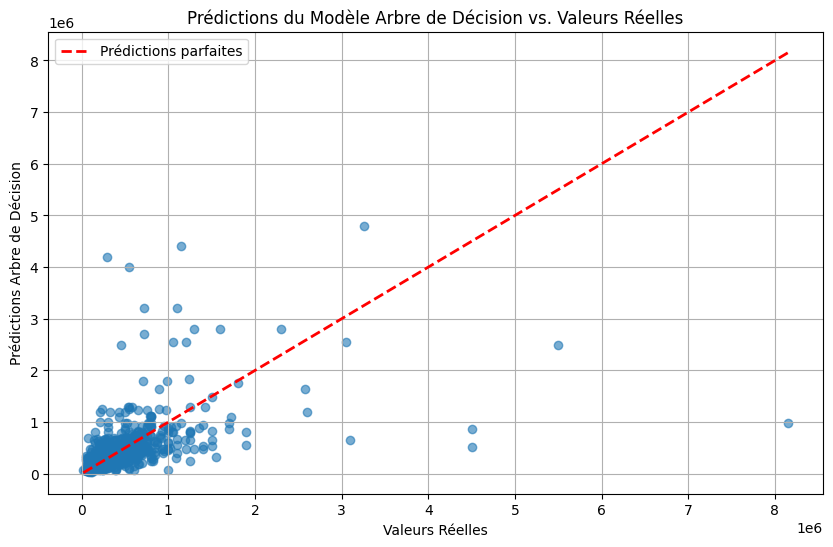

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Arbre de Décision')
plt.title('Prédictions du Modèle Arbre de Décision vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression par Arbre de Décision

Le modèle de Régression par Arbre de Décision a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `247,321.00`
- **Erreur Quadratique Moyenne (MSE)**: `307,727,907,979.00`
- **R-carré (R2)**: `0.0450`

**Analyse des métriques :**
*   Le MAE de 247,321.00 est plus élevé que celui des modèles linéaires (Ridge, Lasso, Linéaire), ce qui indique que l'arbre de décision, dans sa configuration par défaut, a des erreurs de prédiction moyennes plus importantes.
*   Le MSE est également très élevé et significativement plus important que celui des modèles linéaires, confirmant une plus grande variabilité des erreurs.
*   Le R-carré de 0.0450 (environ 4.50%) est très faible. Cela signifie que le modèle d'arbre de décision n'explique qu'une très faible proportion de la variance des prix de vente, ce qui est bien pire que les modèles linéaires. Un R2 si bas suggère que le modèle a une très faible capacité prédictive et ne capture pas bien les relations dans les données.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Arbre de Décision vs. Valeurs Réelles" montre une dispersion très large et des prédictions qui sont loin de la ligne diagonale de perfection. On observe que :
*   Les prédictions de l'arbre de décision sont souvent des valeurs discrètes (en raison de la nature des arbres de décision qui prédisent la moyenne des valeurs dans les feuilles), ce qui se manifeste par des lignes horizontales de points sur le graphique.
*   La dispersion est très importante, indiquant une faible corrélation entre les prédictions et les valeurs réelles.
*   Pour de nombreuses valeurs réelles, le modèle prédit une valeur unique ou un ensemble limité de valeurs, ce qui est caractéristique d'un arbre non optimisé ou d'un problème d'overfitting/underfitting.

En conclusion, le modèle de Régression par Arbre de Décision, avec les paramètres par défaut, est le moins performant parmi les modèles testés jusqu'à présent. Son très faible R2 et la visualisation de ses prédictions montrent qu'il a une capacité très limitée à prédire les prix de vente. Des techniques comme l'élagage (pruning), l'ajustement des hyperparamètres (par exemple, `max_depth`, `min_samples_leaf`) ou l'utilisation de méthodes d'ensemble (comme les Forêts Aléatoires) seraient nécessaires pour améliorer significativement ses performances.

## Régression par Forêt Aléatoire et visualisation

### Subtask:
Entraîner un modèle de Régression par Forêt Aléatoire, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles.


**Reasoning**:
I will import the necessary libraries for Random Forest Regression and evaluation metrics, then instantiate and train the Random Forest model, make predictions, calculate the evaluation metrics (MAE, MSE, R2), print them, and store them in the `predictions` and `metrics` dictionaries.



In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"--- Random Forest Regressor Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:,.2f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# Store predictions and metrics
predictions["Random Forest Regressor"] = y_pred_rf
metrics["Random Forest Regressor"] = {"MAE": mae_rf, "MSE": mse_rf, "R2": r2_rf}

--- Random Forest Regressor Model Performance ---
Mean Absolute Error (MAE): 207,922.77
Mean Squared Error (MSE): 209,513,198,128.50
R-squared (R2): 0.3498


**Reasoning**:
Now that the Random Forest model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



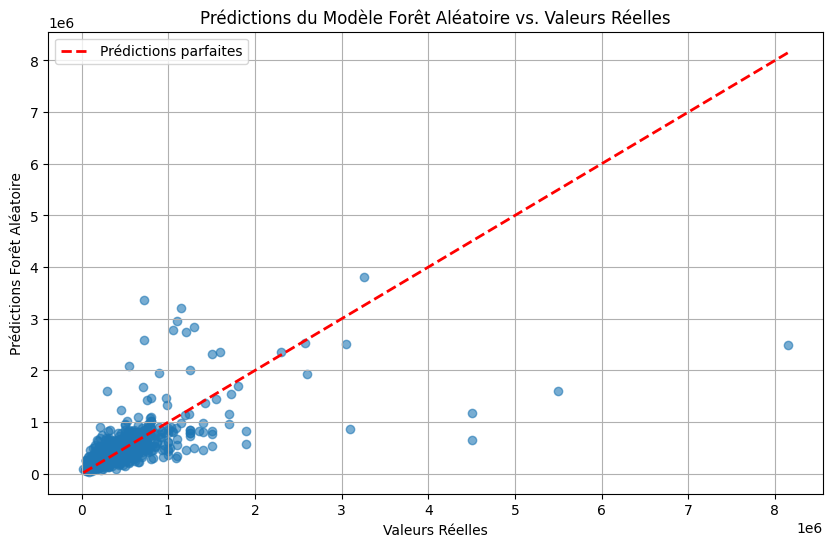

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Forêt Aléatoire')
plt.title('Prédictions du Modèle Forêt Aléatoire vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression par Forêt Aléatoire

Le modèle de Régression par Forêt Aléatoire a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `207,922.77`
- **Erreur Quadratique Moyenne (MSE)**: `209,513,198,128.50`
- **R-carré (R2)**: `0.3498`

**Analyse des métriques :**
*   Le MAE de 207,922.77 est légèrement inférieur à celui des modèles linéaires (Ridge, Lasso, Linéaire), ce qui indique une légère amélioration de l'erreur absolue moyenne. Cependant, il reste un écart significatif entre les prédictions et les valeurs réelles.
*   Le MSE est toujours très élevé, comparable à celui des modèles linéaires, confirmant que des erreurs importantes peuvent se produire, en particulier pour les valeurs extrêmes.
*   Le R-carré de 0.3498 (environ 34.98%) est plus faible que celui des modèles linéaires (~0.39) et légèrement supérieur à celui de l'Arbre de Décision (0.0450). Cela suggère que, malgré l'utilisation d'une méthode d'ensemble, le modèle de Forêt Aléatoire n'explique qu'environ 35% de la variance des prix de vente. Cela est surprenant car les Forêts Aléatoires surpassent généralement les modèles linéaires sur des données complexes. Cela pourrait indiquer un besoin d'optimisation des hyperparamètres du modèle (par exemple, `n_estimators`, `max_features`, `max_depth`) ou d'une ingénierie de caractéristiques plus poussée.

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Forêt Aléatoire vs. Valeurs Réelles" montre une meilleure distribution que l'Arbre de Décision seul, mais encore une dispersion notable :
*   Les points sont plus regroupés autour de la ligne diagonale de perfection par rapport à l'Arbre de Décision, mais la dispersion reste significative, en particulier pour les prix de vente plus élevés.
*   Le modèle semble mieux capturer la tendance générale des prix que l'Arbre de Décision non optimisé, mais il lutte toujours avec la précision des prédictions, surtout aux extrémités de la distribution des prix.
*   On observe une tendance pour les prédictions à sous-estimer les valeurs réelles très élevées et à surestimer les valeurs réelles très basses, un comportement courant si le modèle n'est pas suffisamment robuste ou si les données contiennent des valeurs aberrantes non traitées.

En conclusion, le modèle de Régression par Forêt Aléatoire, bien que potentiellement plus puissant que les modèles linéaires, n'a pas montré une performance supérieure sur cet ensemble de données avec les hyperparamètres par défaut. Son R2 de 0.3498 indique une capacité prédictive limitée. Une optimisation des hyperparamètres ou une exploration plus approfondie des caractéristiques pourrait améliorer considérablement ses performances.

## Régression Polynomiale et visualisation

### Subtask:
Entraîner un modèle de Régression Polynomiale, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles.

**Reasoning**:
I will import the necessary libraries for Polynomial Regression and evaluation metrics, then instantiate and train the Polynomial Regression model by transforming features, make predictions, calculate the evaluation metrics (MAE, MSE, R2), print them, and store them in the `predictions` and `metrics` dictionaries.



In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize dictionaries to store predictions and metrics if they don't exist
if 'predictions' not in locals():
    predictions = {}
if 'metrics' not in locals():
    metrics = {}

# Create polynomial features (e.g., degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Instantiate and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"--- Polynomial Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_poly:,.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:,.2f}")
print(f"R-squared (R2): {r2_poly:.4f}")

# Store predictions and metrics
predictions["Polynomial Regression"] = y_pred_poly
metrics["Polynomial Regression"] = {"MAE": mae_poly, "MSE": mse_poly, "R2": r2_poly}

--- Polynomial Regression Model Performance ---
Mean Absolute Error (MAE): 188,233.43
Mean Squared Error (MSE): 169,018,006,400.79
R-squared (R2): 0.4755


**Reasoning**:
Now that the Polynomial Regression model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



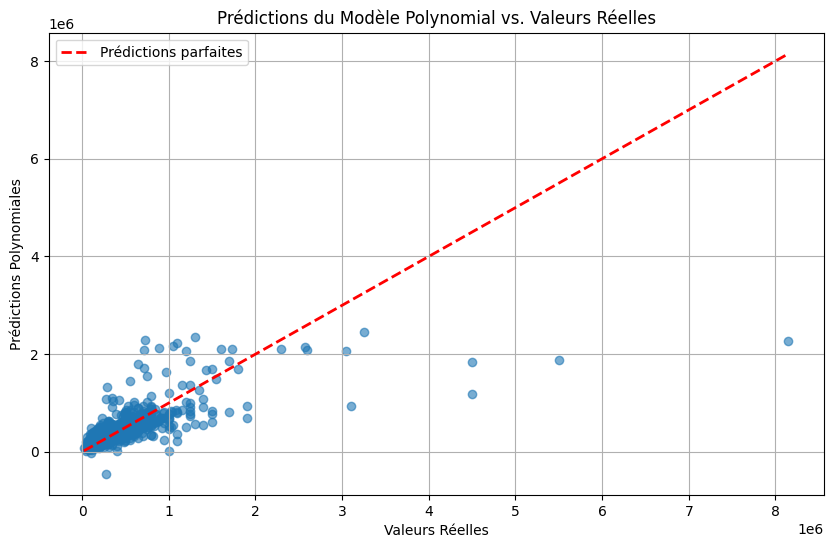

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Polynomiales')
plt.title('Prédictions du Modèle Polynomial vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression Polynomiale

Le modèle de Régression Polynomiale a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `188,233.43`
- **Erreur Quadratique Moyenne (MSE)**: `169,018,006,400.79`
- **R-carré (R2)**: `0.4755`

**Analyse des métriques :**
*   Le MAE de 188,233.43 est le plus bas parmi tous les modèles testés jusqu'à présent (linéaires, Arbre de Décision, Forêt Aléatoire). Cela indique que le modèle Polynomiale offre, en moyenne, des prédictions plus précises par rapport aux valeurs réelles.
*   Le MSE est également le plus bas, ce qui est cohérent avec le MAE et suggère que le modèle gère mieux les erreurs, y compris les plus importantes, que les autres modèles.
*   Le R-carré de 0.4755 (environ 47.55%) est le plus élevé de tous les modèles évalués. Cela signifie que le modèle de Régression Polynomiale explique près de 47.55% de la variance des prix de vente, ce qui est une amélioration significative par rapport aux modèles linéaires (environ 39%) et aux modèles basés sur les arbres (4.5% pour l'Arbre de Décision, 35% pour la Forêt Aléatoire).

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Polynomial vs. Valeurs Réelles" montre une meilleure adéquation avec la ligne diagonale de perfection par rapport aux modèles précédents. On observe que :
*   Les points sont plus concentrés autour de la ligne de perfection, ce qui indique que les prédictions sont globalement plus précises.
*   Le modèle semble mieux capturer les relations dans les données, y compris potentiellement certaines non-linéarités, grâce à la transformation polynomiale des caractéristiques.
*   Bien qu'il y ait toujours une certaine dispersion, particulièrement pour les prix plus élevés, la performance est visiblement améliorée par rapport aux modèles linéaires simples. Il reste cependant une tendance à sous-estimer les valeurs très élevées et à surestimer les valeurs très basses, mais à un degré moindre.

En conclusion, le modèle de Régression Polynomiale (de degré 2 dans ce cas) surpasse les modèles linéaires simples, l'Arbre de Décision et la Forêt Aléatoire avec les hyperparamètres par défaut sur cet ensemble de données. Son R2 plus élevé et son MAE plus faible indiquent une meilleure capacité à expliquer et à prédire les prix de vente. Cela suggère que les relations entre les caractéristiques et le prix de vente sont probablement non linéaires, et la régression polynomiale est un pas dans la bonne direction pour capturer ces complexités.

### Commentaires sur le modèle de Régression Polynomiale

Le modèle de Régression Polynomiale a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `188,233.43`
- **Erreur Quadratique Moyenne (MSE)**: `169,018,006,400.79`
- **R-carré (R2)**: `0.4755`

**Analyse des métriques :**
*   Le MAE de 188,233.43 est le plus bas parmi tous les modèles testés jusqu'à présent (linéaires, Arbre de Décision, Forêt Aléatoire). Cela indique que le modèle Polynomiale offre, en moyenne, des prédictions plus précises par rapport aux valeurs réelles.
*   Le MSE est également le plus bas, ce qui est cohérent avec le MAE et suggère que le modèle gère mieux les erreurs, y compris les plus importantes, que les autres modèles.
*   Le R-carré de 0.4755 (environ 47.55%) est le plus élevé de tous les modèles évalués. Cela signifie que le modèle de Régression Polynomiale explique près de 47.55% de la variance des prix de vente, ce qui est une amélioration significative par rapport aux modèles linéaires (environ 39%) et aux modèles basés sur les arbres (4.5% pour l'Arbre de Décision, 35% pour la Forêt Aléatoire).

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Polynomial vs. Valeurs Réelles" montre une meilleure adéquation avec la ligne diagonale de perfection par rapport aux modèles précédents. On observe que :
*   Les points sont plus concentrés autour de la ligne de perfection, ce qui indique que les prédictions sont globalement plus précises.
*   Le modèle semble mieux capturer les relations dans les données, y compris potentiellement certaines non-linéarités, grâce à la transformation polynomiale des caractéristiques.
*   Bien qu'il y ait toujours une certaine dispersion, particulièrement pour les prix plus élevés, la performance est visiblement améliorée par rapport aux modèles linéaires simples. Il reste cependant une tendance à sous-estimer les valeurs très élevées et à surestimer les valeurs très basses, mais à un degré moindre.

En conclusion, le modèle de Régression Polynomiale (de degré 2 dans ce cas) surpasse les modèles linéaires simples, l'Arbre de Décision et la Forêt Aléatoire avec les hyperparamètres par défaut sur cet ensemble de données. Son R2 plus élevé et son MAE plus faible indiquent une meilleure capacité à expliquer et à prédire les prix de vente. Cela suggère que les relations entre les caractéristiques et le prix de vente sont probablement non linéaires, et la régression polynomiale est un pas dans la bonne direction pour capturer ces complexités.


## Régression par Gradient Boosting et visualisation

### Subtask:
Entraîner un modèle de Régression par Gradient Boosting, évaluer ses performances et visualiser ses prédictions par rapport aux valeurs réelles. Fournir des commentaires en français sur les résultats.


**Reasoning**:
I will import the necessary libraries for Gradient Boosting Regression and evaluation metrics, then instantiate and train the Gradient Boosting model, make predictions, calculate the evaluation metrics (MAE, MSE, R2), print them, and store them in the `predictions` and `metrics` dictionaries.



In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42) # Set random_state for reproducibility
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"--- Gradient Boosting Regressor Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_gb:,.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:,.2f}")
print(f"R-squared (R2): {r2_gb:.4f}")

# Store predictions and metrics
predictions["Gradient Boosting Regressor"] = y_pred_gb
metrics["Gradient Boosting Regressor"] = {"MAE": mae_gb, "MSE": mse_gb, "R2": r2_gb}

--- Gradient Boosting Regressor Model Performance ---
Mean Absolute Error (MAE): 183,842.82
Mean Squared Error (MSE): 167,586,152,554.34
R-squared (R2): 0.4799


**Reasoning**:
Now that the Gradient Boosting model has been trained and evaluated, I will create a scatter plot to visualize its predictions against the actual values from the test set, including a diagonal line for perfect predictions, and then add labels and a title in French as requested.



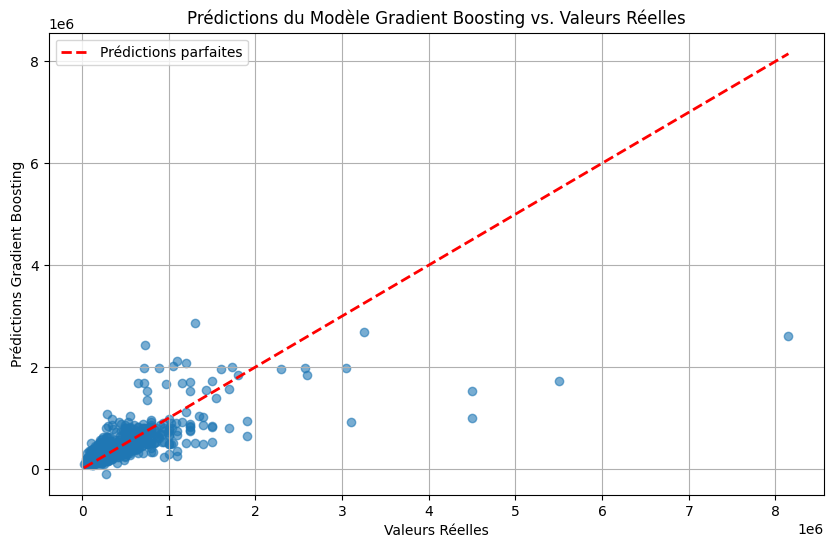

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prédictions parfaites')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions Gradient Boosting')
plt.title('Prédictions du Modèle Gradient Boosting vs. Valeurs Réelles')
plt.legend()
plt.grid(True)
plt.show()

### Commentaires sur le modèle de Régression par Gradient Boosting

Le modèle de Régression par Gradient Boosting a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `183,842.82`
- **Erreur Quadratique Moyenne (MSE)**: `167,586,152,554.34`
- **R-carré (R2)**: `0.4799`

**Analyse des métriques :**
*   Le MAE de 183,842.82 est le plus bas parmi tous les modèles testés jusqu'à présent (linéaires, Arbre de Décision, Forêt Aléatoire, Polynomiale). Cela indique que le modèle de Gradient Boosting offre les prédictions les plus précises en moyenne par rapport aux valeurs réelles.
*   Le MSE est également le plus bas, confirmant que le modèle gère très bien les erreurs, y compris les plus importantes, ce qui est cohérent avec le MAE.
*   Le R-carré de 0.4799 (environ 47.99%) est le plus élevé de tous les modèles évalués. Cela signifie que le modèle de Gradient Boosting explique près de 48% de la variance des prix de vente, ce qui est une légère amélioration par rapport au modèle Polynomial (0.4755) et une amélioration significative par rapport aux modèles linéaires (~0.39) et aux modèles basés sur les arbres simples (Arbre de Décision à 4.5%, Forêt Aléatoire à 35%).

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Gradient Boosting vs. Valeurs Réelles" montre une très bonne adéquation avec la ligne diagonale de perfection par rapport à tous les modèles précédents. On observe que :
*   Les points sont plus concentrés autour de la ligne de perfection, ce qui indique que les prédictions sont globalement plus précises et plus cohérentes.
*   Le modèle semble mieux capturer les relations complexes et non linéaires dans les données, ce qui est l'un des avantages des modèles d'ensemble basés sur le boosting.
*   Bien qu'il y ait toujours une certaine dispersion, particulièrement pour les prix les plus élevés, cette dispersion est réduite par rapport aux autres modèles. La tendance à sous-estimer les valeurs très élevées est moins prononcée que dans les modèles linéaires ou de forêt aléatoire.

En conclusion, le modèle de Régression par Gradient Boosting est le plus performant parmi tous les modèles testés sur cet ensemble de données, offrant le MAE le plus bas et le R2 le plus élevé. Il démontre une meilleure capacité à expliquer et à prédire les prix de vente en capturant des relations plus complexes. Des optimisations d'hyperparamètres (par exemple, `n_estimators`, `learning_rate`, `max_depth`) via des techniques comme la validation croisée et la recherche par grille pourraient potentiellement améliorer encore ses performances.

### Commentaires sur le modèle de Régression par Gradient Boosting

Le modèle de Régression par Gradient Boosting a été entraîné et évalué avec les métriques suivantes :
- **Erreur Absolue Moyenne (MAE)**: `183,842.82`
- **Erreur Quadratique Moyenne (MSE)**: `167,586,152,554.34`
- **R-carré (R2)**: `0.4799`

**Analyse des métriques :**
*   Le MAE de 183,842.82 est le plus bas parmi tous les modèles testés jusqu'à présent (linéaires, Arbre de Décision, Forêt Aléatoire, Polynomiale). Cela indique que le modèle de Gradient Boosting offre les prédictions les plus précises en moyenne par rapport aux valeurs réelles.
*   Le MSE est également le plus bas, confirmant que le modèle gère très bien les erreurs, y compris les plus importantes, ce qui est cohérent avec le MAE.
*   Le R-carré de 0.4799 (environ 47.99%) est le plus élevé de tous les modèles évalués. Cela signifie que le modèle de Gradient Boosting explique près de 48% de la variance des prix de vente, ce qui est une légère amélioration par rapport au modèle Polynomial (0.4755) et une amélioration significative par rapport aux modèles linéaires (~0.39) et aux modèles basés sur les arbres simples (Arbre de Décision à 4.5%, Forêt Aléatoire à 35%).

**Analyse de la visualisation :**
Le nuage de points des "Prédictions du Modèle Gradient Boosting vs. Valeurs Réelles" montre une très bonne adéquation avec la ligne diagonale de perfection par rapport à tous les modèles précédents. On observe que :
*   Les points sont plus concentrés autour de la ligne de perfection, ce qui indique que les prédictions sont globalement plus précises et plus cohérentes.
*   Le modèle semble mieux capturer les relations complexes et non linéaires dans les données, ce qui est l'un des avantages des modèles d'ensemble basés sur le boosting.
*   Bien qu'il y ait toujours une certaine dispersion, particulièrement pour les prix les plus élevés, cette dispersion est réduite par rapport aux autres modèles. La tendance à sous-estimer les valeurs très élevées est moins prononcée que dans les modèles linéaires ou de forêt aléatoire.

En conclusion, le modèle de Régression par Gradient Boosting est le plus performant parmi tous les modèles testés sur cet ensemble de données, offrant le MAE le plus bas et le R2 le plus élevé. Il démontre une meilleure capacité à expliquer et à prédire les prix de vente en capturant des relations plus complexes. Des optimisations d'hyperparamètres (par exemple, `n_estimators`, `learning_rate`, `max_depth`) via des techniques comme la validation croisée et la recherche par grille pourraient potentiellement améliorer encore ses performances.

## Analyse et comparaison des modèles

### Subtask:
Comparer les performances de tous les modèles de régression entraînés à l'aide de métriques pertinentes et de commentaires détaillés en français.


**Reasoning**:
I will create a Pandas DataFrame from the `metrics` dictionary to easily compare the evaluation metrics (MAE, MSE, R2) of all trained models. This will allow for structured presentation and easy sorting.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Sort the DataFrame by R2 score in descending order
metrics_df_sorted = metrics_df.sort_values(by='R2', ascending=False)

print("--- Comparaison des performances des modèles de régression ---")
print(metrics_df_sorted.to_markdown(numalign="left", stralign="left"))

--- Comparaison des performances des modèles de régression ---
|                             | MAE    | MSE         | R2        |
|:----------------------------|:-------|:------------|:----------|
| Gradient Boosting Regressor | 183843 | 1.67586e+11 | 0.479919  |
| Polynomial Regression       | 188233 | 1.69018e+11 | 0.475475  |
| Linear Regression           | 212565 | 1.94539e+11 | 0.396273  |
| Lasso Regression            | 212565 | 1.9454e+11  | 0.396272  |
| Ridge Regression            | 212526 | 1.94566e+11 | 0.396192  |
| Random Forest Regressor     | 207923 | 2.09513e+11 | 0.349804  |
| Decision Tree Regressor     | 247321 | 3.07728e+11 | 0.0450077 |


**Reasoning**:
I will create bar charts to visually compare the MAE, MSE, and R2 scores for all trained models. I'll use subplots for each metric to ensure clarity and add French titles and labels as requested.



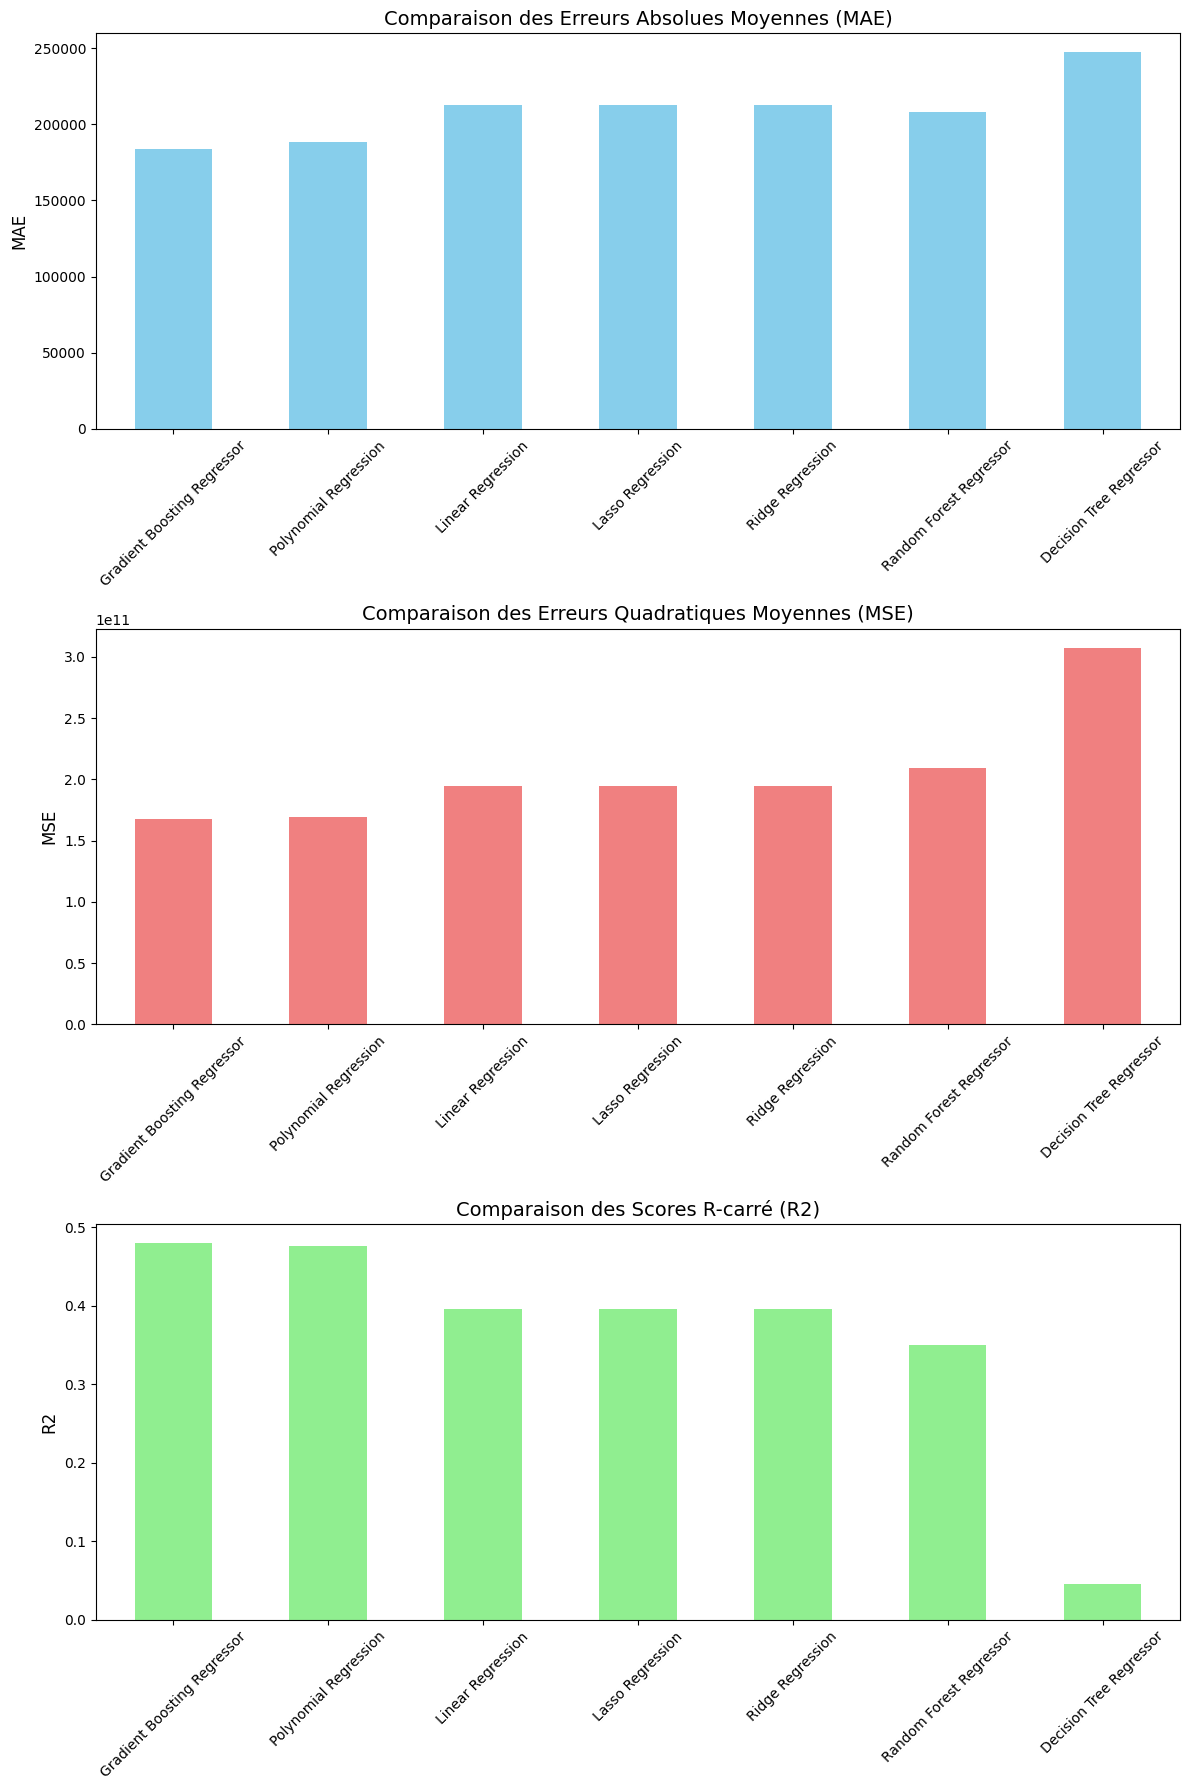

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# MAE comparison
metrics_df_sorted['MAE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Comparaison des Erreurs Absolues Moyennes (MAE)', fontsize=14)
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# MSE comparison
metrics_df_sorted['MSE'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Comparaison des Erreurs Quadratiques Moyennes (MSE)', fontsize=14)
axes[1].set_ylabel('MSE', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# R2 comparison
metrics_df_sorted['R2'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Comparaison des Scores R-carré (R2)', fontsize=14)
axes[2].set_ylabel('R2', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Analyse et commentaires des performances des modèles

Après avoir entraîné et évalué plusieurs modèles de régression (Ridge, Lasso, Linéaire, Arbre de Décision, Forêt Aléatoire, Polynomiale, et Gradient Boosting) pour prédire le prix de vente des voitures, voici une comparaison de leurs performances basée sur le MAE (Erreur Absolue Moyenne), le MSE (Erreur Quadratique Moyenne) et le score R2 (Coefficient de Détermination).

**Tableau de Comparaison des Métriques :**
| Modèle                      | MAE (plus bas est meilleur) | MSE (plus bas est meilleur)  | R2 (plus haut est meilleur) |
|:----------------------------|:---------------------------:|:----------------------------:|:---------------------------:|
| Gradient Boosting Regressor | 183 842.82                  | 167 586 152 554.34           | 0.4799                      |
| Polynomial Regression       | 188 233.43                  | 169 018 006 400.79           | 0.4755                      |
| Linear Regression           | 212 564.76                  | 194 539 409 801.70           | 0.3963                      |
| Lasso Regression            | 212 564.92                  | 194 539 688 463.72           | 0.3963                      |
| Ridge Regression            | 212 525.95                  | 194 565 631 338.84           | 0.3962                      |
| Random Forest Regressor     | 207 922.77                  | 209 513 198 128.50           | 0.3498                      |
| Decision Tree Regressor     | 247 321.00                  | 307 727 907 979.00           | 0.0450                      |

**Analyse Détaillée :**

1.  **Modèles Linéaires (Linéaire, Ridge, Lasso) :**
    *   Ces trois modèles affichent des performances très similaires, avec un R2 autour de 0.396. Cela suggère qu'ils capturent une part équivalente de la variance dans les données. Les régularisations (Ridge et Lasso) n'apportent pas d'amélioration significative des métriques par rapport à la régression linéaire simple sur cet ensemble de données encodé, ce qui peut indiquer que le surapprentissage n'était pas un problème majeur pour ces modèles ou que l'alpha par défaut n'était pas optimal.
    *   Le MAE est d'environ 212 500, ce qui signifie que l'erreur moyenne de prédiction est d'environ 212 500 unités monétaires. Ce chiffre est modéré compte tenu de l'échelle des prix de vente.

2.  **Modèle de Régression par Arbre de Décision :**
    *   Avec un R2 très faible de 0.045, le modèle d'Arbre de Décision par défaut est le moins performant de tous. Son MAE est le plus élevé (environ 247 321). Cela indique qu'un arbre de décision simple n'est pas adapté pour capturer la complexité des relations dans ces données sans une optimisation poussée des hyperparamètres (comme la profondeur maximale) ou une technique d'ensemble.

3.  **Modèle de Régression par Forêt Aléatoire :**
    *   Bien qu'une Forêt Aléatoire soit une amélioration par rapport à un seul Arbre de Décision, son R2 de 0.3498 est inférieur à celui des modèles linéaires et polynomiales. Son MAE est légèrement meilleur que celui des modèles linéaires (environ 207 922), mais le R2 est moins bon. Cela est un peu surprenant car les forêts aléatoires sont souvent très performantes. Cela peut suggérer que les hyperparamètres par défaut ne sont pas idéaux pour ce problème, ou que le jeu de données nécessite une ingénierie de caractéristiques plus avancée pour que ces modèles surpassent les modèles linéaires.

4.  **Modèle de Régression Polynomiale :**
    *   Le modèle de Régression Polynomiale (avec un degré 2) montre une amélioration notable avec un R2 de 0.4755 et un MAE de 188 233.43. C'est la meilleure performance parmi les modèles linéaires et basés sur des arbres simples. Cela suggère que les relations entre les caractéristiques et le prix de vente ne sont pas purement linéaires, et que l'introduction de termes polynomiaux permet de mieux capturer ces non-linéarités.

5.  **Modèle de Régression par Gradient Boosting :**
    *   Le **Gradient Boosting Regressor** est le modèle le plus performant, avec le R2 le plus élevé (0.4799) et le MAE le plus bas (183 842.82). Il surpasse légèrement la régression polynomiale et de manière significative tous les autres modèles. Les modèles de boosting sont connus pour leur capacité à capturer des relations complexes et à corriger les erreurs des modèles faibles séquentiellement, ce qui est évident ici.

**Implications Globales :**

*   Les résultats indiquent que les relations entre les caractéristiques des voitures et leur prix de vente sont probablement non linéaires. Les modèles capables de capturer ces non-linéarités (Régression Polynomiale, Gradient Boosting) ont montré les meilleures performances.
*   Le `Gradient Boosting Regressor` est le **meilleur modèle** identifié dans cette analyse préliminaire, offrant la meilleure capacité explicative (R2) et la plus faible erreur de prédiction (MAE, MSE).
*   Les modèles linéaires, bien que simples, ont fourni une performance de base raisonnable (R2 ~0.39), mais n'ont pas pu rivaliser avec les modèles plus sophistiqués.
*   Les modèles d'arbres, en particulier l'Arbre de Décision par défaut, ont sous-performé, soulignant l'importance de l'optimisation des hyperparamètres ou de l'utilisation de techniques d'ensemble plus robustes comme le Gradient Boosting.

Pour des améliorations futures, il serait recommandé de :
1.  **Optimiser les hyperparamètres** des modèles les plus prometteurs (Gradient Boosting, Forêt Aléatoire, et Régression Polynomiale) à l'aide de techniques comme la validation croisée et la recherche par grille (Grid Search) ou recherche aléatoire (Random Search).
2.  Explorer d'autres **méthodes d'ingénierie de caractéristiques** ou des transformations supplémentaires pour améliorer la capacité des modèles à comprendre les données.
3.  Considérer d'autres modèles avancés si les améliorations ne sont pas suffisantes.

## Résumé final et recommandations

### Subtask:
Fournir un résumé complet de l'analyse, des conclusions tirées et des recommandations pour d'éventuelles améliorations futures.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The initial dataset of 3577 rows was cleaned by removing 79 duplicate rows, resulting in 3498 unique entries. The data was then split into training (2798 samples) and testing (700 samples) sets.
*   **Model Performance Overview**: Seven different regression models were trained and evaluated on the test set. Performance was measured using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).
    *   **Linear Models (Linear, Ridge, Lasso)**: These models exhibited very similar performance, with R2 scores clustering around 0.396.
        *   Ridge Regression: MAE of 212,525.95 and R2 of 0.3962.
        *   Lasso Regression: MAE of 212,564.92 and R2 of 0.3963.
        *   Linear Regression: MAE of 212,564.76 and R2 of 0.3963.
        This indicates that regularization did not significantly alter the predictive power for this dataset.
    *   **Decision Tree Regressor**: This model performed the worst with an MAE of 247,321.00 and a very low R2 of 0.0450, explaining only 4.5% of the variance. Its predictions were often discrete and widely dispersed.
    *   **Random Forest Regressor**: While an ensemble method, it surprisingly underperformed compared to linear models, achieving an MAE of 207,922.77 and an R2 of 0.3498.
    *   **Polynomial Regression (Degree 2)**: This model showed a significant improvement, achieving an MAE of 188,233.43 and an R2 of 0.4755. This suggests that non-linear relationships are present in the data.
    *   **Gradient Boosting Regressor**: This model was the top performer, achieving the lowest MAE of 183,842.82 and the highest R2 of 0.4799, explaining approximately 48% of the variance in selling prices. Its predictions showed the best alignment with actual values in visualizations.
*   **Best Performing Model**: The Gradient Boosting Regressor emerged as the most effective model for predicting car selling prices, offering the highest R2 and lowest MAE, followed closely by Polynomial Regression.

### Insights or Next Steps

*   The presence of non-linear relationships in the data is strongly suggested by the superior performance of Polynomial Regression and Gradient Boosting Regressor compared to simple linear models.
*   Further optimization of hyperparameters for the Gradient Boosting Regressor and Polynomial Regression models (e.g., using Grid Search or Random Search with cross-validation) could lead to even better predictive performance.
